<a href="https://colab.research.google.com/github/Shumerez/DataAnalysisLabs/blob/main/googleCollabLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create an empty figure with no Axes
mainFigure = plt.figure()
mainFigure.subplotpars.update(left = 0.05, bottom = 0.05) # manually add some space to see left & bottom axis

# add Axes named 'mainAxes' to the mainFigure
mainAxes = mainFigure.add_subplot() 

# Equations:
# (1) a11*x + a12*y = b1
# (2) a21*x + a22*y = b2
#
# a11 = firstEquationInput[0]; a12 = firstEquationInput[1]; b1 = firstEquationInput[2]
# a21 = secondEquationInput[0]; a22 = secondEquationInput[1]; b2 = secondEquationInput[2]

# inputs
firstEquationInput = list(map(int,input("\nEnter first equation coefficients WITH SPACES like this 'a11 a12 b1' : ").strip().split()))[:3]
secondEquationInput = list(map(int,input("\nEnter second equation coefficients WITH SPACES like this 'a21 a22 b2' : ").strip().split()))[:3]

# wrap arrays in np.array()
coefficientsSet = np.array( [ firstEquationInput[:2], secondEquationInput[:2] ] )
setOfOrdinates = np.array( [ firstEquationInput[2], secondEquationInput[2] ] )


# calculate normal and expanded matrix ranks
rankOfMatrix = np.linalg.matrix_rank( [ firstEquationInput[:2], secondEquationInput[:2] ] )
rankOfExpandedMatrix = np.linalg.matrix_rank( [ firstEquationInput[:2] + [ firstEquationInput[2] ], secondEquationInput[:2] + [ secondEquationInput[2] ] ] )

# data
x = np.linspace(-20, 20) # Array of Xs

y1 = (firstEquationInput[0] * -x / firstEquationInput[1]) + (firstEquationInput[2] / firstEquationInput[1]) # first equation
y2 = (secondEquationInput[0] * -x / secondEquationInput[1]) + (secondEquationInput[2] / secondEquationInput[1]) # second equation

# Create two plots of F(x) and G(x)
mainAxes.plot(x, y1, label = str(firstEquationInput[0]) + '* x + ' + str(firstEquationInput[1]) + '* y = ' + str(firstEquationInput[2]))
mainAxes.plot(x, y2, label = str(secondEquationInput[0]) + '* x + ' + str(secondEquationInput[1]) + '* y = ' + str(secondEquationInput[2]))

# check for no and infinity solutions via Capelli theorem
if (rankOfMatrix != rankOfExpandedMatrix):                        # (1) No solutions
    print("No possible solutions")
    mainAxes.text(0, -5, "No possible solutions")
elif (rankOfMatrix != 2): # 2 - amount of unknown variables (x,y);  (2) Infinity solutions
    print("Infinity possible solutions")
    mainAxes.text(0, -5, "Infinity possible solutions")
else:                                                             # (3) One solution
    # find answer matrix via np.linalg.solve()
    answerMatrix = np.linalg.solve(coefficientsSet, setOfOrdinates);

    print(answerMatrix);

    # create dot plot to show solution
    mainAxes.scatter(answerMatrix[0], answerMatrix[1], label = 'solution')
    # add annotation
    mainAxes.annotate('solution (' + str(np.format_float_positional(answerMatrix[0], precision=2)) + '; ' + str(np.format_float_positional(answerMatrix[1], precision=2)) + ')',
                      xy=(answerMatrix[0], answerMatrix[1]), xytext=(answerMatrix[0], answerMatrix[1] - 5), arrowprops=dict(facecolor='black', shrink=0.05))

# Add titles
mainAxes.set_title('SLE solution') # set Axes title

# Add labels
mainAxes.set_xlabel('x label')  # Add an x-label to the axes.
mainAxes.set_ylabel('y label')  # Add a y-label to the axes.

# Add grid
mainAxes.grid(True)

#Add legend
mainAxes.legend()

# Print graphics
plt.show()

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

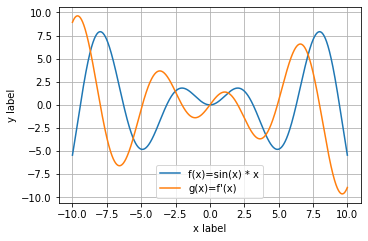

In [ ]:
import torch
import matplotlib.pyplot as plt

# create an empty figure with no Axes
mainFigure = plt.figure()
mainFigure.subplotpars.update(left = 0.2, bottom = 0.2) # manually add some space to see left & bottom axis

# add Axes named 'mainAxes' to the mainFigure
mainAxes = mainFigure.add_subplot() 

# set limits for axis
#mainAxes.set_ylim(-20, 20)
#mainAxes.set_xlim(-20, 20)

# Create x array of numbers from -10 to 10 with 2000 steps-elements
x = torch.linspace(-10, 10, 2000, requires_grad = True)

# Our func
Y = x * torch.sin(x)

# some magic here
y = torch.sum(x * torch.sin(x))

# also magic
y.backward()

# Draw plots
mainAxes.plot(x.detach().numpy(), Y.detach().numpy(), label = 'f(x)=sin(x) * x')
mainAxes.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'g(x)=f\'(x)')

# Add grid
mainAxes.grid(True)

# Add labels
mainAxes.set_xlabel('x label')  # Add an x-label to the axes.
mainAxes.set_ylabel('y label')  # Add a y-label to the axes.

#Add legend
mainAxes.legend()

# Draw a plot actually
plt.show()

